
#EDA Analysis task

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [112]:
# Read the dataset
df=pd.read_csv('cervicalcancer.csv')
df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0
5,42,3,23,2,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
6,51,3,17,6,1,34,3.4,0,0,1,...,?,?,0,0,0,0,1,1,0,1
7,26,1,26,3,0,0,0,1,2,1,...,?,?,0,0,0,0,0,0,0,0
8,45,1,20,5,0,0,0,0,0,0,...,?,?,1,0,1,1,0,0,0,0
9,44,3,15,?,1,1.266972909,2.8,0,0,?,...,?,?,0,0,0,0,0,0,0,0


In [113]:
df.shape

(858, 36)

In [114]:
#Exploring the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

###  Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column



In [115]:
[feature for feature in df.columns if df[feature].dtype=='O']

['Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Time since first diagnosis',
 'STDs: Time since last diagnosis']

In [116]:
#these columns are not of type object, but are of type numeric
cols_to_convert = ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes',
                   'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives',
                   'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)',
                   'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
                   'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                   'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
                   'STDs:HPV', 'STDs: Time since first diagnosis',
                   'STDs: Time since last diagnosis']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors="coerce")
#replacing missing values with null
df.replace('?', np.nan, inplace=True)
from sklearn.impute import SimpleImputer
# For numerical data (using mean imputation)
imputer_mean = SimpleImputer(strategy='mean')
df[cols_to_convert] = pd.DataFrame(imputer_mean.fit_transform(df[cols_to_convert]), columns=cols_to_convert)

In [117]:
def age_cat(age):
    if age < 12:
        return "Child"
    elif age < 20:
        return "Teen"
    elif age < 30:
        return "20's"
    elif age < 40:
        return "30's"
    elif age < 50:
        return "40's"
    elif age < 60:
        return "50's"
    elif age < 70:
        return "60's"
    else:
        return "70+"


df["Age"] = df["Age"].astype(int)
df["age_cat"] = df["Age"].apply(age_cat)

In [118]:
std_cols = {'STDs:condylomatosis',
            'STDs:cervical condylomatosis',
            'STDs:vaginal condylomatosis',
            'STDs:vulvo-perineal condylomatosis',
            'STDs:syphilis',
            'STDs:pelvic inflammatory disease',
            'STDs:genital herpes',
            'STDs:molluscum contagiosum',
            'STDs:AIDS',
            'STDs:HIV',
            'STDs:Hepatitis B',
            'STDs:HPV'}

df["total_std"] =df[list(std_cols)].sum(axis=1)


In [119]:
test_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
df["total_tests"] = df[test_cols].sum(axis = 1)

In [120]:
to_int = {"total_tests",
                     "total_std",
                     "Smokes",
                     "Biopsy",
                     "Dx:Cancer",
                     "Num of pregnancies",
                     "Number of sexual partners",
                     "First sexual intercourse",
                     "Hormonal Contraceptives",
                     "IUD",
                     "STDs",
                     "STDs (number)",
                     "STDs: Number of diagnosis",
                     "Dx:CIN",
                     "Dx:HPV",
                     "Dx",
                     "Hinselmann",
                     "Schiller",
                     "Biopsy",
                     "Citology"}

to_int = to_int.union(std_cols)

for col in to_int:
    df[col] = df[col].fillna(0).astype(int)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    int64  
 2   First sexual intercourse            858 non-null    int64  
 3   Num of pregnancies                  858 non-null    int64  
 4   Smokes                              858 non-null    int64  
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    int64  
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    int64  
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [122]:
df.isna().sum()

,0
Age,0
Number of sexual partners,0
First sexual intercourse,0
Num of pregnancies,0
Smokes,0
Smokes (years),0
Smokes (packs/year),0
Hormonal Contraceptives,0
Hormonal Contraceptives (years),0
IUD,0


<Axes: >

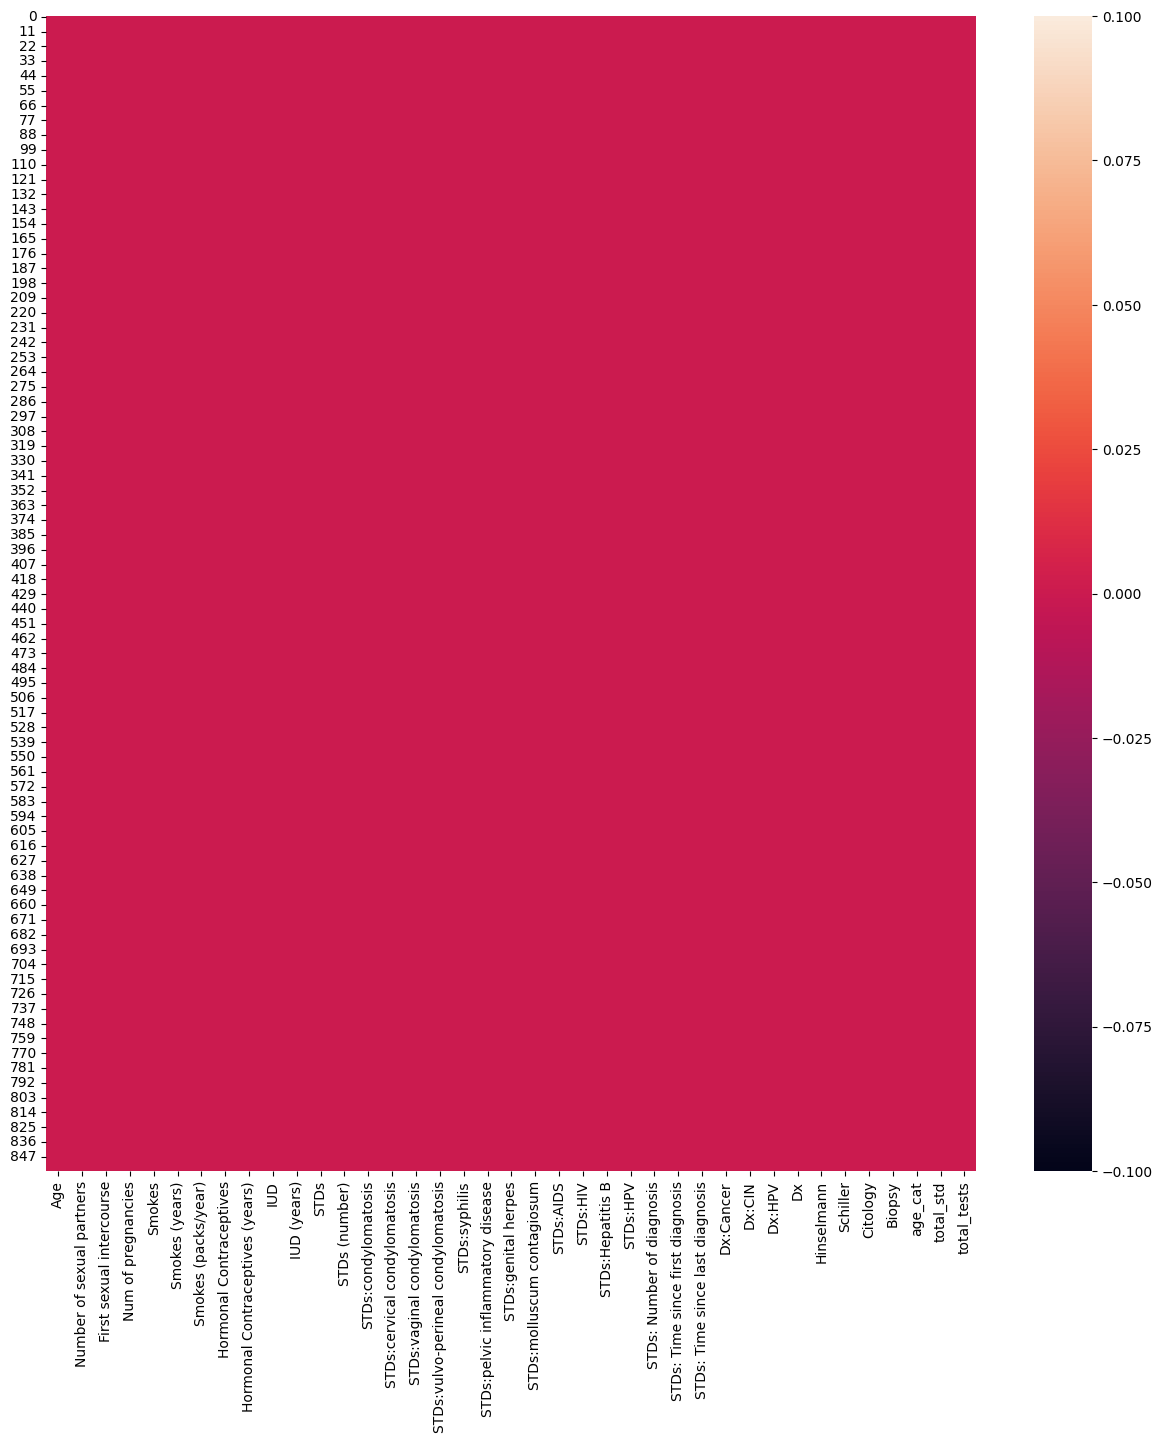

In [123]:
#plot heatmap of missing values
df.isnull()
plt.figure(figsize=(15,15))
sns.heatmap(df.isnull())

## Insights or Observation

The columns 'STDs: Time since first diagnosis' &
'STDs: Time since last diagnosis' are not of much use as they are having 787 missing values so we can simply drop them

In [124]:
#dropping unnecessary columns
df = df.drop(columns = ['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [126]:
# For numerical data (using mean imputation)
imputer_mean = SimpleImputer(strategy='mean')
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

df_imputed = pd.DataFrame(imputer_mean.fit_transform(numeric_df),
                         columns=numeric_df.columns)

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit and transform the imputed DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

In [128]:
print("Original DataFrame:")
print(df.head)

print("\nDataFrame after imputation:")
print(df_imputed.head)

print("\nStandardized DataFrame:")
print(df_scaled.head)

Original DataFrame:
<bound method NDFrame.head of      Age  Number of sexual partners  First sexual intercourse  \
0     18                          4                        15   
1     15                          1                        14   
2     34                          1                        16   
3     52                          5                        16   
4     46                          3                        21   
..   ...                        ...                       ...   
853   34                          3                        18   
854   32                          2                        19   
855   25                          2                        17   
856   33                          2                        24   
857   29                          2                        20   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                     1       0             0.0                  0.0   
1                     1  

In [129]:
## Check Duplicates
df.duplicated().sum()

25

In [130]:
from sklearn.base import BaseEstimator, TransformerMixin
# Define the custom transformer
class RemoveDuplicates(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop_duplicates()


In [131]:
# Create the pipeline
pipeline = Pipeline(steps=[
    ('remove_duplicates', RemoveDuplicates()),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Apply the pipeline
df_processed = pd.DataFrame(pipeline.fit_transform(df_scaled), columns=df_scaled.columns)

In [132]:
## 3.1 Checking the number of uniques values of each columns
df_scaled.nunique()

,0
Age,44
Number of sexual partners,12
First sexual intercourse,21
Num of pregnancies,11
Smokes,2
Smokes (years),31
Smokes (packs/year),63
Hormonal Contraceptives,2
Hormonal Contraceptives (years),41
IUD,2


In [133]:
## Check the statistics of the dataset
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,total_std,total_tests
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.987179,2.257576,0.143357,1.219721,0.453144,0.560606,2.256419,0.096737,...,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103,0.155012,0.242424
std,8.497948,1.644759,2.793320,1.400981,0.350641,4.057885,2.209657,0.496603,3.519082,0.295771,...,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078,0.529617,0.741797
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.256419,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000
